In [3]:
import pandas as pd
from matplotlib import pyplot as plt

file_path = 'code/project/benchmark_results.csv'

df = pd.read_csv(
    file_path, 
    sep="|",              
    skiprows=[1],          
    skipinitialspace=True, 
    engine='python'        
)


df.columns = df.columns.str.strip()

df['Latency'] = df['Latency'].astype(str).str.replace('ms', '').str.strip().astype(int)

print(df)

     N   f    M  Latency
0    3   1    3       10
1    3   1   10       23
2    3   1  100      113
3   10   4    3       61
4   10   4   10       79
5   10   4  100      201
6  100  49    3      231
7  100  49   10      353
8  100  49  100     1343


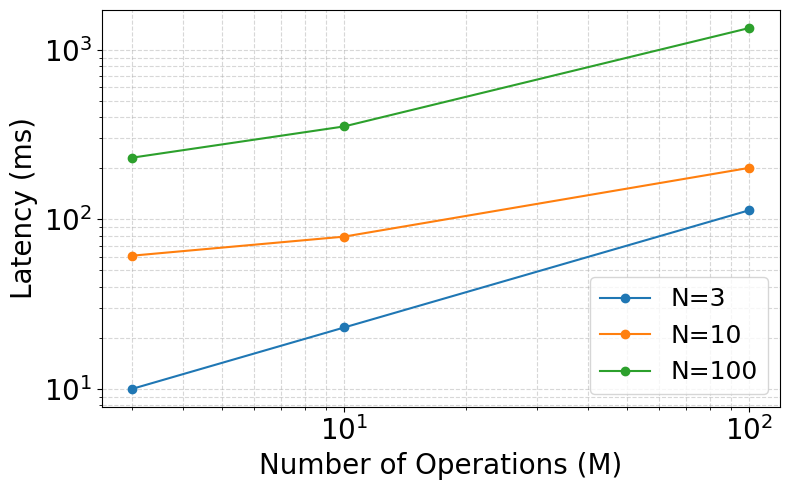

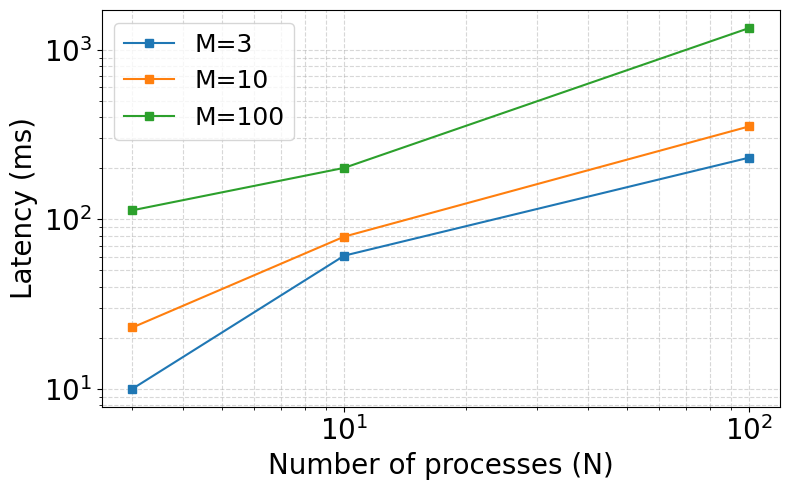

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_latency_vs_m(df):
    fig, ax = plt.subplots(figsize=(8,5))
    
    for n_val in sorted(df['N'].unique()):
        subset = df[df['N'] == n_val].sort_values('M')
        ax.plot(subset['M'], subset['Latency'], marker='o', label=f'N={n_val}')
    
    ax.set_xlabel('Number of Operations (M)', fontsize=20)
    ax.set_ylabel('Latency (ms)', fontsize=20)
    ax.tick_params(labelsize=20, color='black')

    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.legend(fontsize=18)
    ax.grid(True, which="both", ls="--", alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('report/img/lat_vs_m.pdf', bbox_inches='tight')
    plt.show() 

def plot_latency_vs_n(df):
    fig, ax = plt.subplots(figsize=(8,5))
    
    for m_val in sorted(df['M'].unique()):
        subset = df[df['M'] == m_val].sort_values('N')
        ax.plot(subset['N'], subset['Latency'], marker='s', label=f'M={m_val}')
    
    ax.set_xlabel('Number of processes (N)', fontsize=20)
    ax.set_ylabel('Latency (ms)', fontsize=20)
    ax.tick_params(labelsize=20, color='black')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.legend(fontsize=18)
    ax.grid(True, which="both", ls="--", alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('report/img/lat_vs_n.pdf', bbox_inches='tight')
    plt.show()

plot_latency_vs_m(df)
plot_latency_vs_n(df)